# Single family (SFH) vs. Multi family (MFH) homes

## Hypothesis
Our zoning code strongly discourages multi-family homes. Are city government representatives fairly representing their voters, or their districts?

In [141]:
import pandas as pd
import numpy as np
import geopandas as geo_pd
import seaborn as sns
from dbfread import DBF
from io import BytesIO
from dvc.api import DVCFileSystem
from zipfile import ZipFile
import matplotlib.pyplot as plt
%matplotlib inline

fs = DVCFileSystem("https://github.com/tjrileywisc/waltham_etl")

## Political divisions

In [63]:
with fs.open("data/gis/wardsprecincts2022_poly.zip") as f:
    content = BytesIO(f.read())
    zip = ZipFile(content)
    zip.extractall("../../data/gis")
    wards_df = geo_pd.read_file("../../data/gis/wardsprecincts2022_poly/WARDSPRECINCTS2022_POLY.shp")
    wards_df = wards_df[wards_df["TOWN_ID"] == 308]
    wards_df.reset_index(inplace=True)

wards_df.head()

,index,WARD,PRECINCT,WP_DISTRIC,WP_NAME,TOWN,TOWN_ID,POP_2020,AREA_MILES,PERIMETER_,SHAPE_AREA,SHAPE_LEN,geometry
0,916,1,1,1-1,Waltham Precinct 1-1,WALTHAM,308,3738,2.49,9.71,6.443128e+06,15625.783517,"POLYGON ((218613.885 906734.200, 218621.222 90..."
1,917,5,2,5-2,Waltham Precinct 5-2,WALTHAM,308,3669,0.26,3.80,6.855663e+05,6113.757618,"POLYGON ((222337.302 902475.771, 222334.579 90..."
2,918,6,1,6-1,Waltham Precinct 6-1,WALTHAM,308,3784,0.29,2.89,7.550182e+05,4655.327881,"POLYGON ((221235.219 903475.163, 221287.931 90..."
3,919,6,2,6-2,Waltham Precinct 6-2,WALTHAM,308,3595,0.49,4.51,1.258103e+06,7265.495350,"POLYGON ((222432.008 903923.750, 222436.731 90..."
4,942,7,1,7-1,Waltham Precinct 7-1,WALTHAM,308,3754,0.93,6.32,2.417402e+06,10171.427707,"POLYGON ((220276.656 902900.169, 220280.733 90..."


## Property tax parcels

In [65]:

with fs.open("data/gis/L3_SHP_M308_WALTHAM.zip") as f:
    content = BytesIO(f.read())
    zip = ZipFile(content)
    zip.extractall("../../data/gis")
    property_shapefiles_df = geo_pd.read_file("../../data/gis/L3_SHP_M308_WALTHAM/M308TaxPar_CY22_FY23.shp")
    property_shapefiles_df['centroid'] = property_shapefiles_df['geometry'].apply(lambda x: x.centroid)

    assessments_table = DBF("../../data/gis/L3_SHP_M308_WALTHAM/M308Assess_CY22_FY23.dbf", load=True)
    assessments_df = pd.DataFrame([dict(r) for r in assessments_table.records])
    
    def home_style(x):
        if int(x) == 101:
            return "SFH"
        elif int(x) > 102 and int(x) <= 112:
            return "MFH"
    
        return "OTHER OR NON HOME"

    assessments_df["HOME_STYLE"] = assessments_df["USE_CODE"].apply(lambda x: home_style(x))

property_shapefiles_df.head() 

,SHAPE_Leng,SHAPE_Area,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,TOWN_ID,geometry,centroid
0,106.284365,416.922636,R079 001 0038,F_720118_2954451,FEE,079,ASSESS,NaN,20111130,OK,N,308,"POLYGON ((219510.406 900516.563, 219505.564 90...",POINT (219492.454 900518.533)
1,124.114669,875.162824,R079 001 0036,F_720144_2954524,FEE,079,ASSESS,NaN,20111130,OK,N,308,"POLYGON ((219521.229 900544.743, 219512.577 90...",POINT (219500.236 900540.754)
2,89.087299,415.368750,R080 002 0014,F_722474_2954539,FEE,080,ASSESS,NaN,20111130,OK,N,308,"POLYGON ((220212.276 900527.633, 220199.657 90...",POINT (220210.372 900545.361)
3,190.134403,1076.273990,R079 001 0037,F_720055_2954540,FEE,079,ASSESS,NaN,20111130,OK,N,308,"POLYGON ((219481.807 900560.359, 219483.941 90...",POINT (219473.170 900545.465)
4,102.019748,615.329243,R079 001 0033,F_720183_2954604,FEE,079,ASSESS,NaN,20111130,OK,N,308,"POLYGON ((219530.434 900568.770, 219524.316 90...",POINT (219512.264 900565.209)


In [66]:
assessments_df

,PROP_ID,LOC_ID,BLDG_VAL,LAND_VAL,OTHER_VAL,TOTAL_VAL,FY,LOT_SIZE,LS_DATE,LS_PRICE,...,BLD_AREA,UNITS,RES_AREA,STYLE,STORIES,NUM_ROOMS,LOT_UNITS,CAMA_ID,TOWN_ID,HOME_STYLE
0,R063 002 0017,F_734012_2963106,257400,392000,7300,656700,2023,0.11,20080930,385000,...,1352,1,1352,COLONIAL,2,6,A,28,308,SFH
1,R015 004 0001,F_730830_2973583,236500,388900,0,625400,2023,0.22,20080422,1,...,1931,1,1931,RANCH,1,5,A,46,308,SFH
2,R015 003 0017,F_730659_2973534,171600,382200,5200,559000,2023,0.21,19770301,39500,...,1756,1,1756,CONVENTIONAL,2,7,A,55,308,SFH
3,R015 005 0001,F_730718_2973342,400200,391900,6100,798200,2023,0.23,20061205,1,...,2922,1,2922,COLONIAL,2,6,A,64,308,SFH
4,R015 006 0006,F_730548_2973294,369300,382600,2700,754600,2023,0.21,20050315,1,...,1792,1,1792,COLONIAL,2,8,A,73,308,SFH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16509,R032 001 022B,F_724665_2970529,709400,299900,0,1009300,2023,0.13,20220308,1250000,...,3374,1,3374,COLONIAL,2,7,A,212623,308,SFH
16510,R025 003 012A,F_731918_2972585,148100,344100,0,492200,2023,0.12,20210505,352500,...,2255,1,2255,COLONIAL,2,7,A,212624,308,SFH
16511,R025 003 012B,F_731940_2972635,187700,354200,0,541900,2023,0.14,20210505,352500,...,3592,1,3592,COLONIAL,2,8,A,212625,308,SFH
16512,R016 006 001B,F_731686_2973257,738800,366000,0,1104800,2023,0.17,20220610,1320000,...,2782,1,2782,COLONIAL,2,8,A,212626,308,SFH


## Stucture types in data

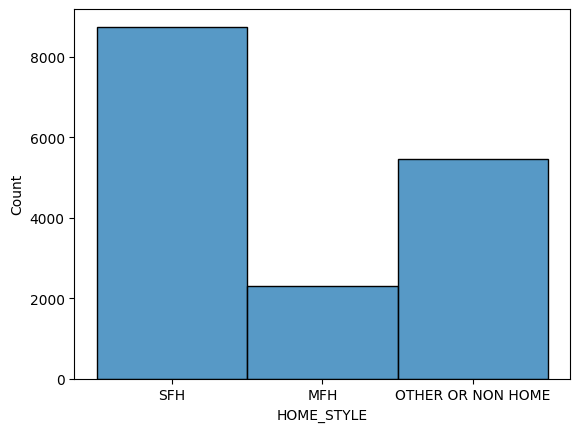

In [67]:
ax = sns.histplot(data=assessments_df, x="HOME_STYLE", kde=False)

In [68]:
assessments_df["HOME_STYLE"].value_counts()

SFH                  8743
OTHER OR NON HOME    5461
MFH                  2310
Name: HOME_STYLE, dtype: int64

In [138]:
# merge tax dfs together
properties_df = property_shapefiles_df.merge(assessments_df, left_on=["MAP_PAR_ID", "LOC_ID", "TOWN_ID"], right_on=["PROP_ID", "LOC_ID", "TOWN_ID"], how="outer")

# find wards they belong to
properties_df = properties_df.sjoin(wards_df, how="left", predicate="within")

# filter out invalid properties
properties_df = properties_df[~properties_df["MAP_PAR_ID"].isna()]
properties_df = properties_df[~properties_df["WARD"].isna()]

# some type corrections
properties_df["WARD"] = properties_df["WARD"].astype(int)

properties_df.head()

,SHAPE_Leng,SHAPE_Area,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,...,PRECINCT,WP_DISTRIC,WP_NAME,TOWN,TOWN_ID_right,POP_2020,AREA_MILES,PERIMETER_,SHAPE_AREA,SHAPE_LEN
0,106.284365,416.922636,R079 001 0038,F_720118_2954451,FEE,079,ASSESS,NaN,20111130.0,OK,...,1,7-1,Waltham Precinct 7-1,WALTHAM,308.0,3754.0,0.93,6.32,2.417402e+06,10171.427707
1,124.114669,875.162824,R079 001 0036,F_720144_2954524,FEE,079,ASSESS,NaN,20111130.0,OK,...,1,7-1,Waltham Precinct 7-1,WALTHAM,308.0,3754.0,0.93,6.32,2.417402e+06,10171.427707
2,89.087299,415.368750,R080 002 0014,F_722474_2954539,FEE,080,ASSESS,NaN,20111130.0,OK,...,2,7-2,Waltham Precinct 7-2,WALTHAM,308.0,3773.0,0.73,5.68,1.879452e+06,9145.170905
3,190.134403,1076.273990,R079 001 0037,F_720055_2954540,FEE,079,ASSESS,NaN,20111130.0,OK,...,1,7-1,Waltham Precinct 7-1,WALTHAM,308.0,3754.0,0.93,6.32,2.417402e+06,10171.427707
4,102.019748,615.329243,R079 001 0033,F_720183_2954604,FEE,079,ASSESS,NaN,20111130.0,OK,...,1,7-1,Waltham Precinct 7-1,WALTHAM,308.0,3754.0,0.93,6.32,2.417402e+06,10171.427707


## Which home types dominate each ward?

Only 8 and 9 have majority MFH, with 5 and 6 closest to parity.

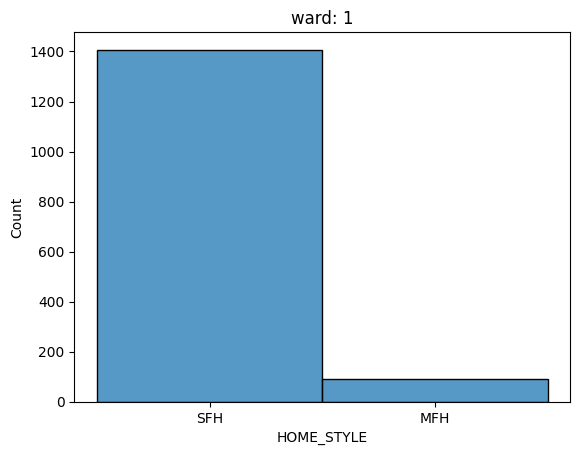

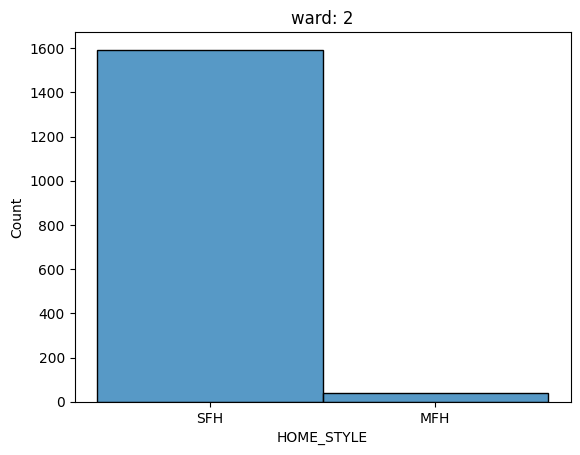

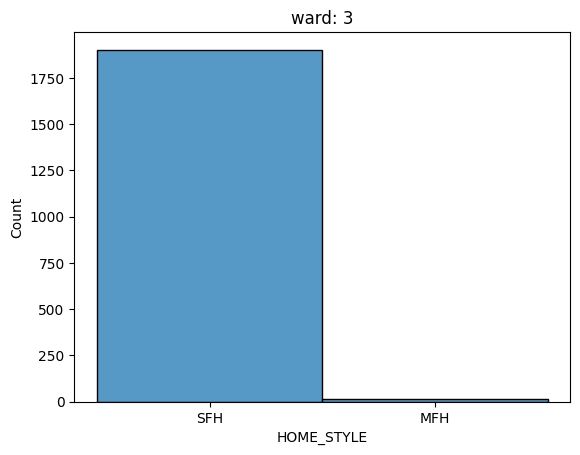

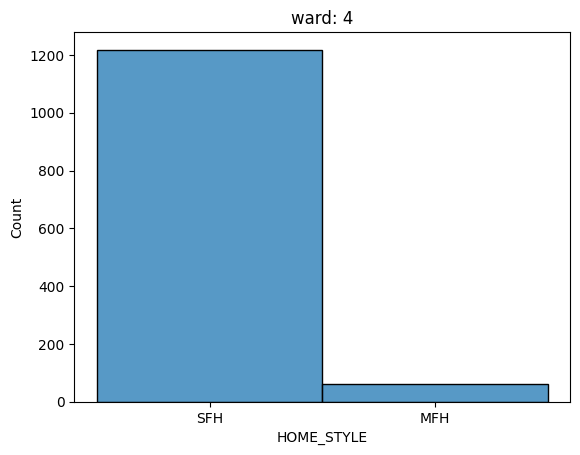

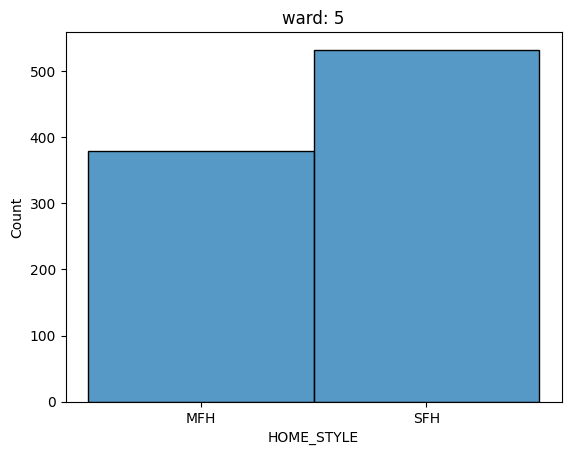

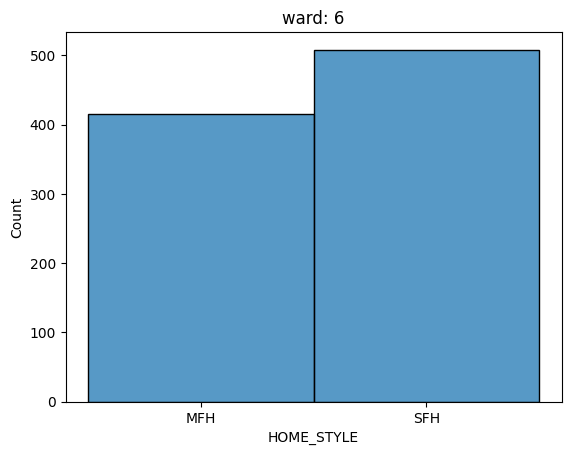

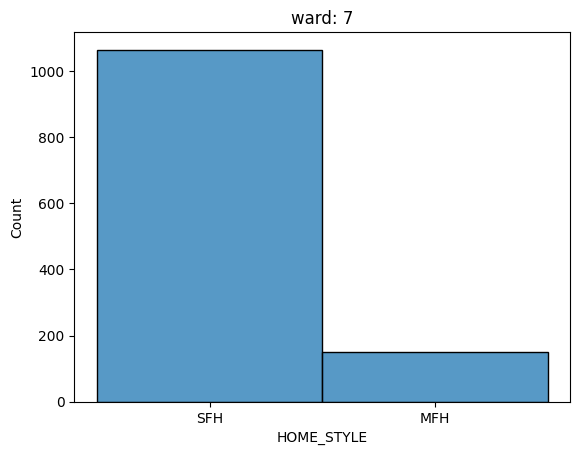

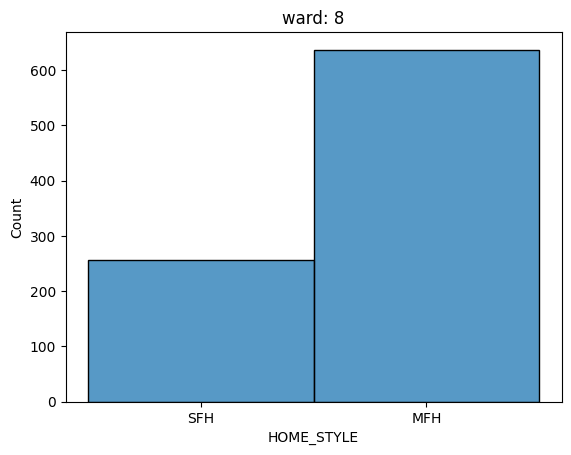

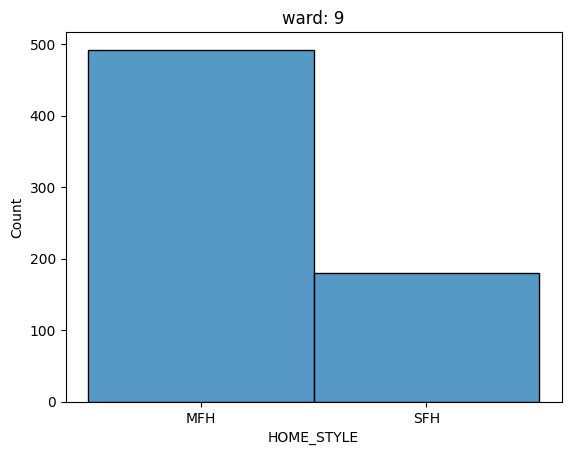

In [145]:
for ward in np.sort(properties_df["WARD"].unique()):
    c = (properties_df["WARD"] == ward) & (properties_df["HOME_STYLE"].isin(["SFH", "MFH"]))
    ax = sns.histplot(data=properties_df[c], x="HOME_STYLE", kde=False)
    ax.set_title(f"ward: {ward}")
    plt.show()